### Salary Estimation Using K-Nearest Neighbors (K-NN) Algorithm

#### *Importing libraries*

In [3]:
import pandas as pd
import numpy as np

#### *Loading dataset file*

In [4]:
data=pd.read_csv("salary.csv")

#### *Summarizing dataset*

In [5]:
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [6]:
data.shape

(32561, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### *Mapping Salary Data to Binary Value*

In [14]:
income=set(data["income"])
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [21]:
print(data.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


#### *Seggregating Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [25]:
X=data.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [26]:
Y=data.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

## 
###  
#### *Splitting data into train & test*

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20,random_state=5)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_test

array([[ 1.27973263, -0.42021793, -0.14449046, -0.03509495],
       [-0.62970237,  1.13486453, -0.14449046, -1.65163466],
       [-0.48282275, -0.03144732, -0.14449046, -0.03509495],
       ...,
       [ 1.64693166,  1.13486453, -0.14449046, -0.03509495],
       [ 1.72037147, -0.42021793, -0.14449046, -0.03509495],
       [ 1.42661224, -0.42021793, -0.14449046, -1.08584576]])

In [30]:
X_train

array([[-0.48282275,  0.3573233 , -0.14449046, -0.03509495],
       [-0.85002179, -0.42021793, -0.14449046, -0.03509495],
       [ 0.83909378, -2.36407102, -0.14449046, -0.03509495],
       ...,
       [-0.40938294,  0.3573233 , -0.14449046, -0.03509495],
       [ 1.72037147,  1.91240577, -0.14449046, -2.05576959],
       [-0.04218391,  1.13486453,  0.83993307, -0.03509495]])

### *Finding the best K - Value*

In [32]:
error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

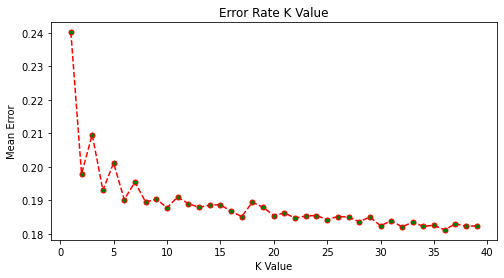

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='.',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### *by studying above graph i want to use the value of K(n_neighbors) as 17*

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')
model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

#### Estimating the salary for single input

In [54]:
age=int(input("Enter the age of an employee:"))
education=int(input("Enter the education of an employee:"))
Capital_gain=int(input("Enter the capital gain of an employee:"))
Work_hours=int(input("Enter the working hours per week of an employee:"))
newEMP=[[age,education, Capital_gain,Work_hours]]
income_pred=model.predict(sc.transform(newEMP))
print(income_pred)

Enter the age of an employee:20
Enter the education of an employee:12
Enter the capital gain of an employee:50000
Enter the working hours per week of an employee:25
[1]


In [55]:
if income_pred==1:
    print("Employee can get salary more than 50K")
else:
    print("Employee cannot get the salary more than 50K")

Employee can get salary more than 50K


### 
# 
#### prediction for test data

In [56]:
Y_test_pred=model.predict(X_test)

In [57]:
Y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print(np.concatenate((Y_test_pred.reshape(len(Y_test_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Evaluating the accuracy of the model

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(Y_test,Y_test_pred)
print(cm)

[[4626  327]
 [ 879  681]]


In [60]:
model_accuracy=accuracy_score(Y_test,Y_test_pred)

In [69]:
print("Accuracy of the Model: {0} %".format((model_accuracy*100)))

Accuracy of the Model: 81.48318747121142 %
